# Aprendisagem de maquinas

Bloco de notas utilizado ao longo da disciplina que servirá de trabalho para a aprovação.

## Regressão linear Simples

O objetivo é ver a relação entre a bolsa de valores (Ibovespa) e o Dolar.

### Importação dos dados

Para importar os dados, utilizaremos a biblioteca do *Yahoo Finances* para podemos pegar os dados. 
Iremos pegar as cotações:

* Do Ibovespa ('BOVA11.SA');
* Dolar em relação ao Real ('USDBRL=X');

In [1]:
import yfinance as yf

ibov = yf.Ticker('BOVA11.SA')
dolar = yf.Ticker('USDBRL=X')

In [2]:
ibov_hist = ibov.history(period='max')
display("Serie historica do Ibovespa")
ibov_hist

'Serie historica do Ibovespa'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-04-17 00:00:00-03:00,45.700001,45.980000,45.599998,45.849998,274700,0.0,0.0
2009-04-20 00:00:00-03:00,44.790001,44.900002,44.070000,44.419998,265800,0.0,0.0
2009-04-22 00:00:00-03:00,44.610001,45.240002,44.509998,44.990002,234800,0.0,0.0
2009-04-23 00:00:00-03:00,45.189999,45.900002,44.860001,45.900002,305900,0.0,0.0
2009-04-24 00:00:00-03:00,46.169998,46.849998,46.099998,46.689999,325600,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-25 00:00:00-03:00,112.110001,112.570000,111.930000,112.570000,2741332,0.0,0.0
2023-09-26 00:00:00-03:00,111.900002,111.900002,110.650002,110.650002,5567555,0.0,0.0
2023-09-27 00:00:00-03:00,111.500000,111.820000,109.889999,110.699997,4850443,0.0,0.0


In [3]:
dolar_hist = dolar.history(period='max')
display("Serie historica do Dolar (em valor de Real)")
dolar_hist

'Serie historica do Dolar (em valor de Real)'

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01 00:00:00+00:00,2.9460,2.9460,2.923000,2.9230,0,0.0,0.0
2003-12-02 00:00:00+00:00,2.9230,2.9310,2.923000,2.9310,0,0.0,0.0
2003-12-03 00:00:00+00:00,2.9310,2.9360,2.926000,2.9310,0,0.0,0.0
2003-12-04 00:00:00+00:00,2.9310,2.9430,2.931000,2.9430,0,0.0,0.0
2003-12-05 00:00:00+00:00,2.9430,2.9480,2.934000,2.9340,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-26 00:00:00+01:00,4.9683,4.9829,4.936556,4.9683,0,0.0,0.0
2023-09-27 00:00:00+01:00,4.9862,5.0559,4.983250,4.9862,0,0.0,0.0
2023-09-28 00:00:00+01:00,5.0422,5.0652,5.014375,5.0422,0,0.0,0.0


Primeiramente, iremos ver graficamente os dados dos indices, relacionando a data, com o valor de fechamento.

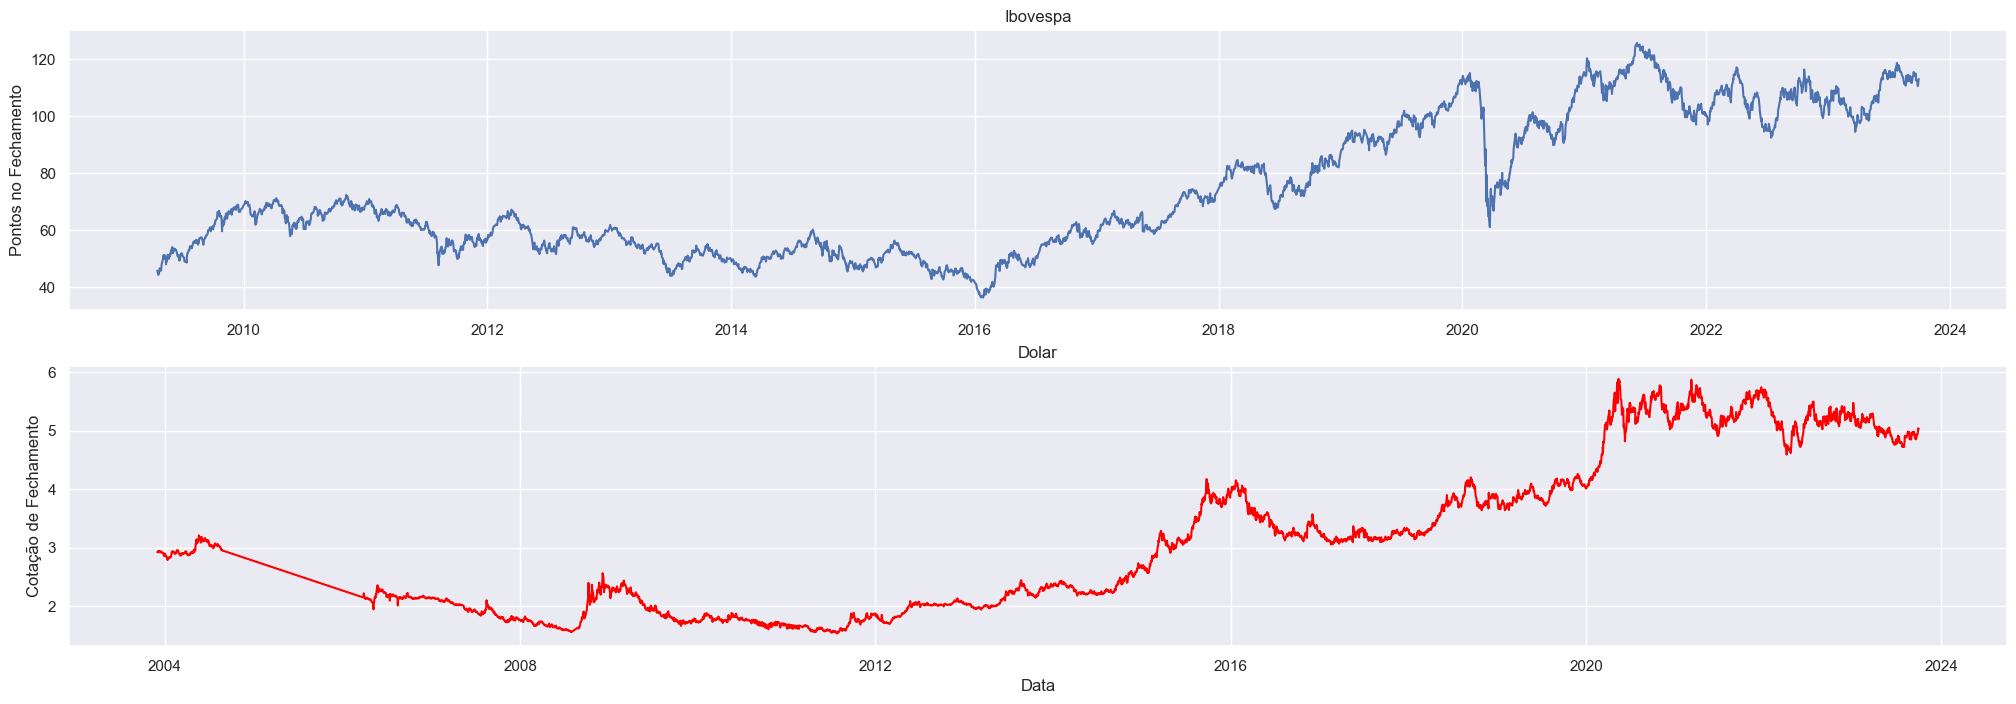

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(25, 8))
plt.subplot(2, 1, 1)
plt.title('Ibovespa')
plt.ylabel('Pontos no Fechamento')
plt.plot(ibov_hist['Close'], label='IBOV')

plt.subplot(2, 1, 2)
plt.title('Dolar')
plt.xlabel('Data')
plt.ylabel('Cotação de Fechamento')
plt.plot(dolar_hist['Close'], color='red')

plt.show()

### Tratamento dos dados

Nesse passo, iremos fazer uma união dos dados, visando tirar linhas que não tenham todos os valores e garantir que estejam com a mesma data (uma unica referencia).

In [5]:
import pandas as pd

dolar_hist = dolar.history(period='max')
ibov_hist = ibov.history(period='max')

ibov_hist.index = ibov_hist.index.strftime('%Y-%m-%d')
ibov_hist = ibov_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
dolar_hist.index = dolar_hist.index.strftime('%Y-%m-%d')
dolar_hist = dolar_hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

df_ibov_dolar = pd.merge(ibov_hist, dolar_hist, left_index=True, right_index=True)
df_ibov_dolar.columns =['IBOV', 'DOLAR']
plt.show()
df_ibov_dolar

,IBOV,DOLAR
Date,,
2009-04-17,45.849998,2.1826
2009-04-20,44.419998,2.2303
2009-04-22,44.990002,2.2010
2009-04-23,45.900002,2.2075
2009-04-24,46.689999,2.1935
...,...,...
2023-09-25,112.570000,4.9339
2023-09-26,110.650002,4.9683
2023-09-27,110.699997,4.9862


### Correlação entre os dados

Iremos agora, avaliar a correlação dos dados, no caso o fechamento do dolar e do ibovespa. Para isso, num primeiro momento vamos criar um **"mapa de calor"**.

<Axes: >

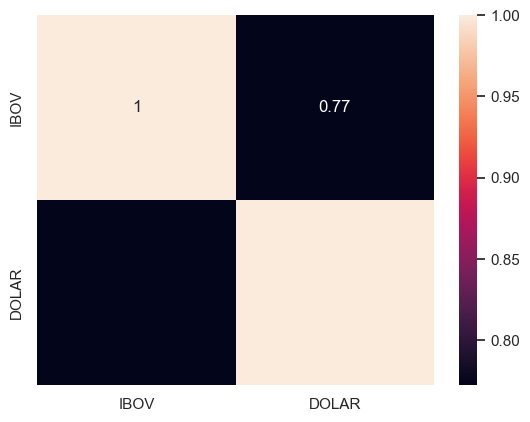

In [6]:
sns.heatmap(df_ibov_dolar.corr(), annot=True)

Para facilitar a visualização, será feita janelas de visualização de um ano. 


<Axes: xlabel='Date'>

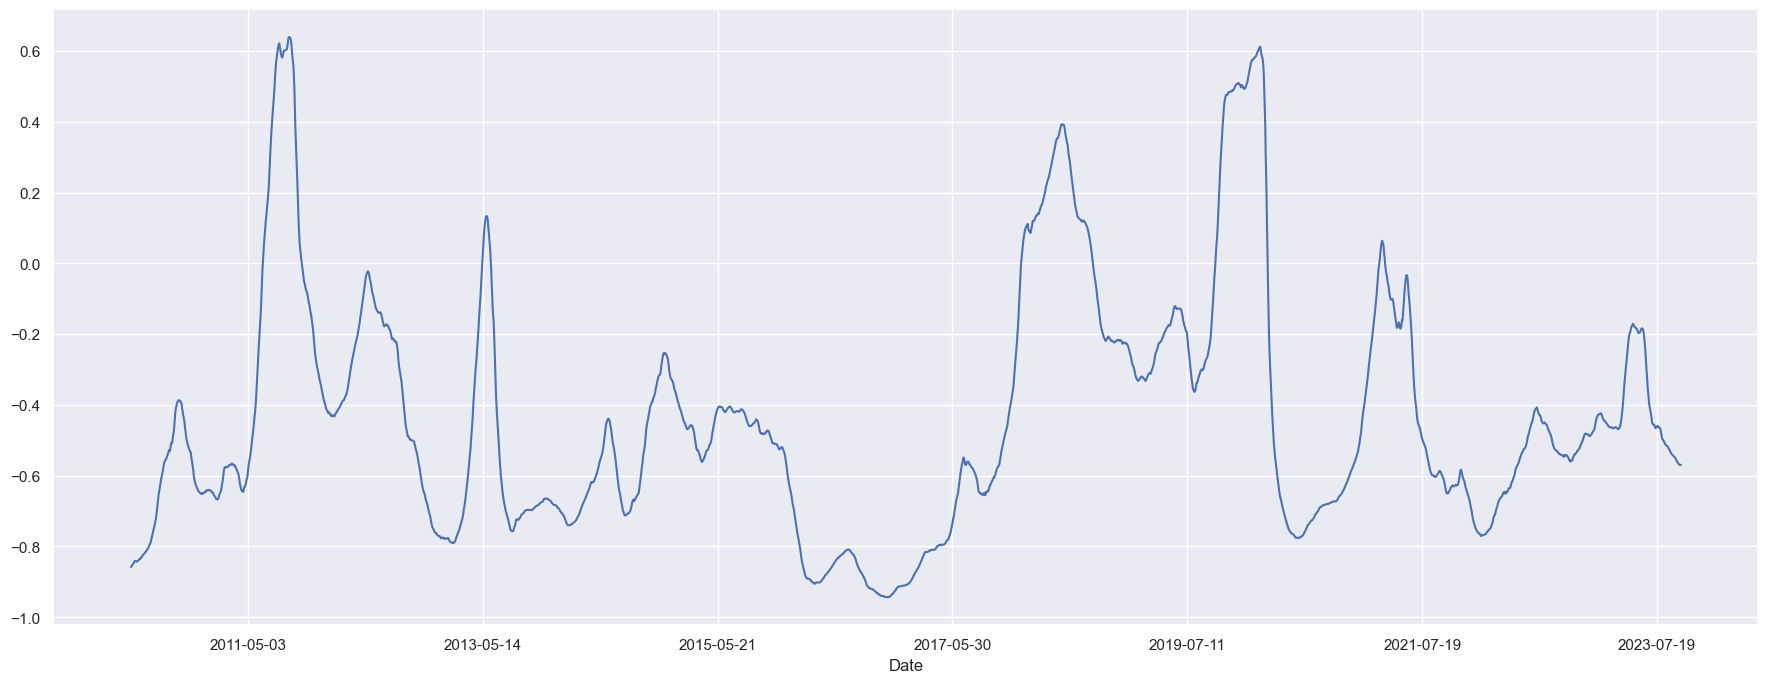

In [7]:
df_ibov_dolar['DOLAR'].rolling(252).corr(df_ibov_dolar['IBOV']).plot(figsize=(22,8))

De Maneira geral, o que vemos é que existe momentos que se tem alta correlação positiva e vales com alta correlação negativa. Lembrando que o ponto onde indica onde não existe correlação é o entorno do zero.

### Aplicando a Regressão Linear ao dados

Iremos dividir em dois momentos, no primeiro usaremos o *dataframe* todo e num segundo momento apenas uma janela. Para isso vamos usar a ferramenta do [*Scikit-learn*](https://scikit-learn.org/stable/).

#### Regressão Linear de todo o DataFrame

Como já temos os dados e base, basta:
* Separar os dados de treinamento;
* Dados de validação;
* Aplicar o metodo;
* Validar saida;

In [10]:
from sklearn.linear_model import LinearRegression


plt.plot(df_ibov_dolar['DOLAR'], df_ibov_dolar['IBOV'],'o', color='black')

ModuleNotFoundError: No module named 'sklearn'

https://www.youtube.com/watch?v=oETq2bwBD5k
https://www.youtube.com/watch?v=n2uZU8cRQuQ
https://www.youtube.com/watch?v=Z27o-vKyboI
https://www.youtube.com/watch?v=V7ceBXbbYpM
https://www.youtube.com/watch?v=Te9LjUzQJyg
https://www.youtube.com/watch?v=MPkNWpwxz7M&t=152s
https://www.youtube.com/watch?v=FGFB9_eq4x4&list=PLCAhGm8nJ9CAecNp5x_B_dERAfjigOP0j
https://www.youtube.com/watch?v=E9SlPswKGCg
https://www.youtube.com/watch?v=E5zq8e5TDqo
https://www.youtube.com/watch?v=7GGrt3-rRH8&list=PLCAhGm8nJ9CDd7kFl0PUgrvsrimmu13rE
https://www.youtube.com/watch?v=1teVmrrQFOg